# PCA+逻辑回归预测检查者是否患糖尿病

In [16]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,9,122,56,0,0,33.3,1.114,33,1
1,2,112,66,22,0,25.0,0.307,24,0
2,1,103,30,38,83,43.3,0.183,33,0
3,1,138,82,0,0,40.1,0.236,28,0
4,9,72,78,25,0,31.6,0.280,38,0


In [17]:
#X y 赋值
X = data.drop(['label'],axis=1)
y = data.loc[:,'label']
X.head()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [18]:
print(X.shape,y.shape)

(600, 8) (600,)


In [19]:
#逻辑回归模型
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X,y)

LogisticRegression(max_iter=1000)

In [20]:
#结果预测
y_predict = model1.predict(X)
print(y_predict)

[1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [21]:
#模型评估
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9183333333333333


In [22]:
#数据的标准化
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[ 1.61220139  0.09768458 -0.7354873  ...  0.26204583  2.01357116
   0.04951422]
 [-0.51645181 -0.20789804 -0.16980036 ... -0.79351368 -0.48113519
  -0.72549099]
 [-0.82054513 -0.4829224  -2.20627333 ...  1.53380426 -0.86446057
   0.04951422]
 ...
 [ 1.00401476  1.99229683  0.84843612 ...  0.54183268 -0.33275117
   0.73840774]
 [ 0.09173482 -0.26901457 -0.16980036 ...  0.08399964  0.02584355
  -0.29493254]
 [-1.12463844  0.55605851 -1.6405864  ...  1.50836909  5.642797
   0.04951422]]


In [23]:
#计算均值与标准差
x1_mean = X.loc[:,'glucose'].mean()
x1_norm_mean = X_norm[:,1].mean()
x1_sigma = X.loc[:,'glucose'].std()
x1_norm_sigma = X_norm[:,1].std()
print(x1_mean,x1_sigma,x1_norm_mean,x1_norm_sigma)


118.80333333333333 32.75167847546886 1.865174681370263e-16 0.9999999999999998


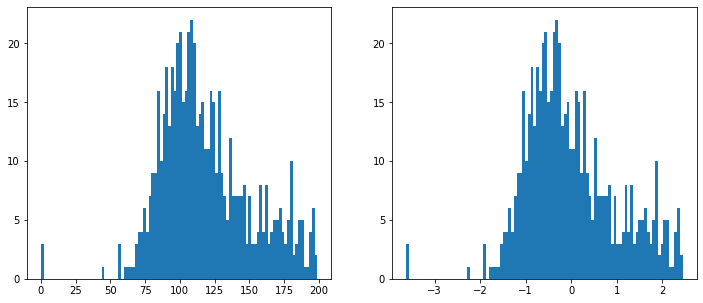

In [24]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(12,5))
fig1_1 = plt.subplot(121)
plt.hist(X.loc[:,'glucose'],bins=100)

fig1_2 = plt.subplot(122)
plt.hist(X_norm[:,1],bins=100)
plt.show()

In [25]:
#pca分析
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
print(sum(var_ratio))

[2.15669029 1.74035262 1.03817655 0.87890467 0.75186028 0.61865346
 0.42446137 0.40425636]
[0.26913698 0.2171815  0.12955578 0.10967998 0.0938259  0.0772028
 0.05296924 0.05044782]
1.0


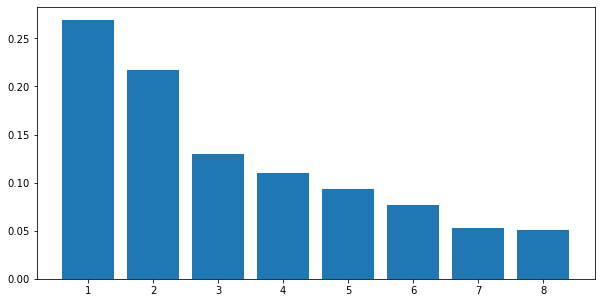

In [26]:
#可视化方差比例
fig2 = plt.figure(figsize=(10,5))
plt.bar([1,2,3,4,5,6,7,8],var_ratio)
plt.show()

In [27]:
#数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
print(X_pca.shape,X_norm.shape)
#计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)

(600, 2) (600, 8)
[0.26913698 0.2171815 ]


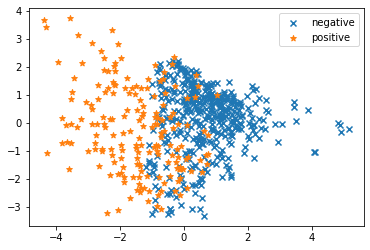

In [28]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0],marker='x',label='negative')
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1],marker='*',label='positive')
plt.legend()
plt.show()

In [29]:
#降维后的模型建立与训练
model2 = LogisticRegression()
model2.fit(X_pca,y)


LogisticRegression()

In [30]:
#模型预测
y_predict_pca = model2.predict(X_pca)
accuracy_pca = accuracy_score(y,y_predict_pca)
print(accuracy_pca)

0.8766666666666667


![materials](materials2.png)